In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

In [17]:
team_medal = pd.read_csv("teams.csv")

In [18]:
team_medal

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3


In [19]:
team_medal = team_medal[["team", "country","year","events",  "athletes","prev_medals", "medals"]]

In [20]:
 team_medal

,team,country,year,events,athletes,prev_medals,medals
0,AFG,Afghanistan,1964,8,8,0.0,0
1,AFG,Afghanistan,1968,5,5,0.0,0
2,AFG,Afghanistan,1972,8,8,0.0,0
3,AFG,Afghanistan,1980,11,11,0.0,0
4,AFG,Afghanistan,2004,5,5,0.0,0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,0.0,0
2140,ZIM,Zimbabwe,2004,11,14,0.0,3
2141,ZIM,Zimbabwe,2008,15,16,3.0,4
2142,ZIM,Zimbabwe,2012,8,9,4.0,0


In [21]:
 numeric_teams = team_medal.select_dtypes(include=[np.number])

In [22]:
 correlation = numeric_teams.corr()

In [23]:
 print(correlation["medals"])

year          -0.021603
events         0.771330
athletes       0.840817
prev_medals    0.920048
medals         1.000000
Name: medals, dtype: float64


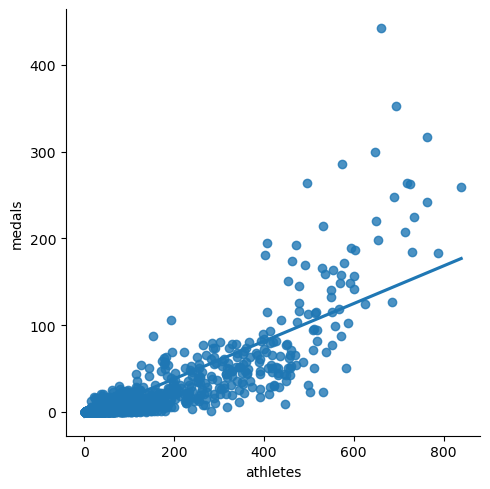

In [24]:
sns.lmplot(x="athletes", y="medals",data=team_medal, fit_reg=True , ci=None)

<Axes: ylabel='Frequency'>

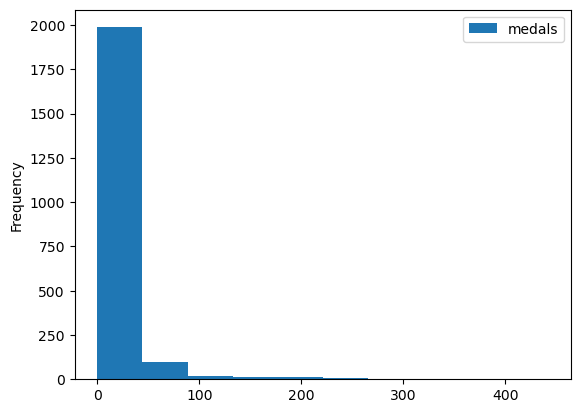

In [25]:
team_medal.plot.hist(y="medals")

In [26]:
team_medal[team_medal.isnull().any(axis=1)] 

,team,country,year,events,athletes,prev_medals,medals
19,ALB,Albania,1992,8,9,NaN,0
26,ALG,Algeria,1964,7,7,NaN,0
39,AND,Andorra,1976,2,3,NaN,0
50,ANG,Angola,1980,14,17,NaN,0
59,ANT,Antigua and Barbuda,1976,11,17,NaN,0
...,...,...,...,...,...,...,...
2092,VIN,Saint Vincent and the Grenadines,1988,6,6,NaN,0
2103,YAR,North Yemen,1984,3,3,NaN,0
2105,YEM,Yemen,1992,8,8,NaN,0
2112,YMD,South Yemen,1988,5,5,NaN,0


In [27]:
team_medal=team_medal.dropna()

In [28]:
team_medal

,team,country,year,events,athletes,prev_medals,medals
0,AFG,Afghanistan,1964,8,8,0.0,0
1,AFG,Afghanistan,1968,5,5,0.0,0
2,AFG,Afghanistan,1972,8,8,0.0,0
3,AFG,Afghanistan,1980,11,11,0.0,0
4,AFG,Afghanistan,2004,5,5,0.0,0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,0.0,0
2140,ZIM,Zimbabwe,2004,11,14,0.0,3
2141,ZIM,Zimbabwe,2008,15,16,3.0,4
2142,ZIM,Zimbabwe,2012,8,9,4.0,0


In [29]:
train=team_medal[team_medal["year"]<2012].copy()
test = team_medal[team_medal["year"]>=2012].copy()

In [30]:
train.shape

(1609, 7)

In [31]:
test.shape

(405, 7)

In [32]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [33]:
predictors = ["athletes","prev_medals"]
target="medals"

In [34]:
reg.fit(train[predictors],train["medals"])

LinearRegression()

In [35]:
predictions = reg.predict(test[predictors])

In [36]:
predictions

array([-9.61221245e-01, -1.17633261e+00, -1.42503158e+00, -1.71184673e+00,
        2.15562926e+00,  3.91463636e+00, -1.71184673e+00, -1.85525431e+00,
        3.67563128e-01, -2.77770967e-01, -1.85525431e+00, -1.49673537e+00,
        4.67519911e+01,  2.87550937e+01,  4.58450091e+00,  2.54773581e+00,
       -1.85525431e+00, -1.64014295e+00, -1.85525431e+00, -1.85525431e+00,
        1.46556876e+02,  1.20571799e+02,  6.56314795e+00,  3.95275254e+00,
        7.34283247e+00,  1.03117468e+01,  5.19171882e+00,  3.58517645e+00,
       -1.64014295e+00, -1.64014295e+00, -1.56843916e+00, -1.20992022e+00,
       -1.71184673e+00, -1.42503158e+00,  1.17929959e+01,  1.00049298e+01,
       -1.78355052e+00, -1.71184673e+00, -1.56843916e+00, -1.56843916e+00,
       -1.99866189e+00, -1.99866189e+00, -1.56843916e+00, -1.35332779e+00,
       -1.92695810e+00, -1.92695810e+00,  3.28912706e+01,  2.53042547e+01,
       -1.78355052e+00, -1.28162400e+00, -1.85525431e+00, -3.87590939e-01,
        7.83480779e+01,  

In [37]:
test["predictions"] = predictions

In [38]:
test

,team,country,year,events,athletes,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,6,1.0,1,-0.961221
7,AFG,Afghanistan,2016,3,3,1.0,0,-1.176333
24,ALB,Albania,2012,9,10,0.0,0,-1.425032
25,ALB,Albania,2016,6,6,0.0,0,-1.711847
37,ALG,Algeria,2012,29,39,2.0,1,2.155629
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,3,0.0,0,-1.926958
2131,ZAM,Zambia,2012,7,7,0.0,0,-1.640143
2132,ZAM,Zambia,2016,7,7,0.0,0,-1.640143
2142,ZIM,Zimbabwe,2012,8,9,4.0,0,1.505767


In [39]:
test.loc[test["predictions"]<0,"predictions"]=0

In [40]:
test["predictions"] = test["predictions"].round()

In [41]:
test

,team,country,year,events,athletes,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,6,1.0,1,0.0
7,AFG,Afghanistan,2016,3,3,1.0,0,0.0
24,ALB,Albania,2012,9,10,0.0,0,0.0
25,ALB,Albania,2016,6,6,0.0,0,0.0
37,ALG,Algeria,2012,29,39,2.0,1,2.0
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,3,0.0,0,0.0
2131,ZAM,Zambia,2012,7,7,0.0,0,0.0
2132,ZAM,Zambia,2016,7,7,0.0,0,0.0
2142,ZIM,Zimbabwe,2012,8,9,4.0,0,2.0


In [42]:
from sklearn.metrics import mean_absolute_error
error=mean_absolute_error(test["medals"],test["predictions"])

In [43]:
error

3.2987654320987656

In [44]:
test.describe() ["medals"]

count    405.000000
mean       9.785185
std       28.820300
min        0.000000
25%        0.000000
50%        0.000000
75%        5.000000
max      264.000000
Name: medals, dtype: float64

In [45]:
team_medal.describe() ["medals"]

count    2014.000000
mean       10.990070
std        33.627528
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max       442.000000
Name: medals, dtype: float64

In [46]:
test[test["team"] == "IND"]

,team,country,year,events,athletes,prev_medals,medals,predictions
907,IND,India,2012,55,95,3.0,6,7.0
908,IND,India,2016,67,130,6.0,2,12.0


In [47]:
errors=(test["medals"]-test["predictions"]).abs()

In [48]:
errors

6       1.0
7       0.0
24      0.0
25      0.0
37      1.0
       ... 
2111    0.0
2131    0.0
2132    0.0
2142    2.0
2143    0.0
Length: 405, dtype: float64

In [49]:
error_by_team = errors.groupby(test["team"]).mean()

In [50]:
error_by_team

team
AFG    0.5
ALB    0.0
ALG    1.5
AND    0.0
ANG    0.0
      ... 
VIE    1.0
VIN    0.0
YEM    0.0
ZAM    0.0
ZIM    1.0
Length: 204, dtype: float64

In [51]:
medals_by_team = test["medals"].groupby(test["team"]).mean()

In [52]:
error_ratio = error_by_team / medals_by_team

In [53]:
error_ratio

team
AFG    1.0
ALB    NaN
ALG    1.0
AND    NaN
ANG    NaN
      ... 
VIE    1.0
VIN    NaN
YEM    NaN
ZAM    NaN
ZIM    inf
Length: 204, dtype: float64

In [54]:
error_ratio[~pd.isnull(error_ratio )]

team
AFG    1.000000
ALG    1.000000
ARG    0.853659
ARM    0.428571
AUS    0.367347
         ...   
USA    0.126953
UZB    0.625000
VEN    1.750000
VIE    1.000000
ZIM         inf
Length: 102, dtype: float64

In [55]:
error_ratio = error_ratio[np.isfinite(error_ratio )]

In [56]:
error_ratio

team
AFG    1.000000
ALG    1.000000
ARG    0.853659
ARM    0.428571
AUS    0.367347
         ...   
UKR    0.951220
USA    0.126953
UZB    0.625000
VEN    1.750000
VIE    1.000000
Length: 97, dtype: float64

<Axes: ylabel='Frequency'>

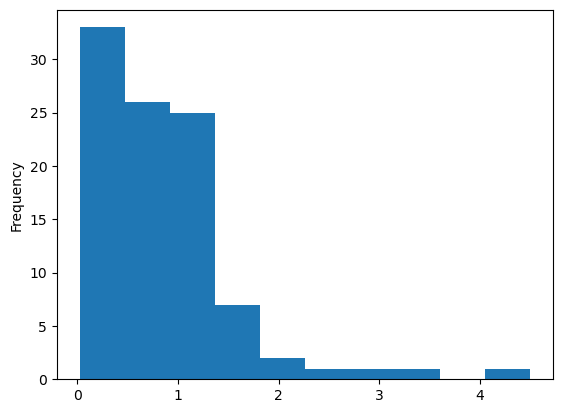

In [57]:
error_ratio.plot.hist()

In [58]:
error_ratio.sort_values()

team
FRA    0.022472
CAN    0.048387
NZL    0.063492
RUS    0.082353
ITA    0.121429
         ...   
MAR    2.000000
EGY    2.400000
HKG    3.000000
POR    3.333333
AUT    4.500000
Length: 97, dtype: float64

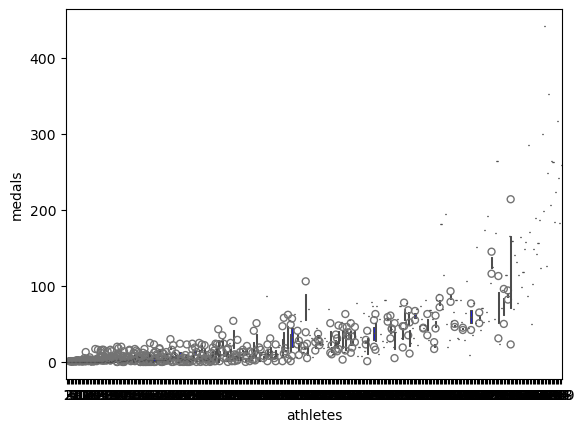

In [59]:
sns.boxenplot(x="athletes", y="medals", color="b", width_method="linear", data=team_medal)

plt.show()

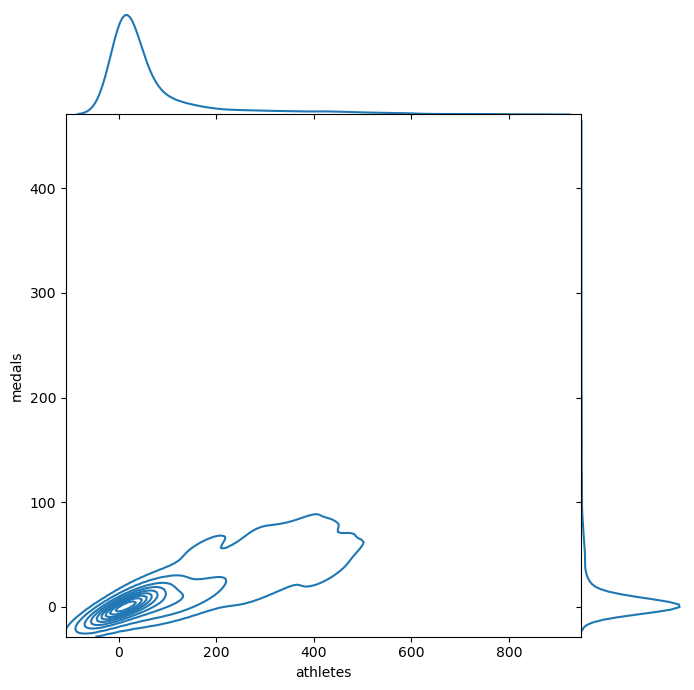

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correct usage with 'data' parameter
g = sns.jointplot(x='athletes', y='medals', data=team_medal, kind="kde", height=7, space=0)
plt.show()


In [106]:
print(team_medal.head())  # This will show the first 5 rows of the dataset

  team      country  year  events  athletes  prev_medals  medals
0  AFG  Afghanistan  1964       8         8          0.0       0
1  AFG  Afghanistan  1968       5         5          0.0       0
2  AFG  Afghanistan  1972       8         8          0.0       0
3  AFG  Afghanistan  1980      11        11          0.0       0
4  AFG  Afghanistan  2004       5         5          0.0       0


In [110]:
team_medal.loc[:, 'medals_per_athlete'] = team_medal['medals'] / team_medal['athletes']

In [112]:
team_medal = team_medal.dropna(subset=['medals', 'athletes'])
team_medal['medals_per_athlete'] = team_medal['medals'] / team_medal['athletes']


In [114]:
team_medal

,team,country,year,events,athletes,prev_medals,medals,medals_per_athlete
0,AFG,Afghanistan,1964,8,8,0.0,0,0.000000
1,AFG,Afghanistan,1968,5,5,0.0,0,0.000000
2,AFG,Afghanistan,1972,8,8,0.0,0,0.000000
3,AFG,Afghanistan,1980,11,11,0.0,0,0.000000
4,AFG,Afghanistan,2004,5,5,0.0,0,0.000000
...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,0.0,0,0.000000
2140,ZIM,Zimbabwe,2004,11,14,0.0,3,0.214286
2141,ZIM,Zimbabwe,2008,15,16,3.0,4,0.250000
2142,ZIM,Zimbabwe,2012,8,9,4.0,0,0.000000


In [116]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(train[predictors])
reg.fit(X_poly, train["medals"])


LinearRegression()

In [118]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(train[predictors], train["medals"])
rf_predictions = rf.predict(test[predictors])


In [124]:
from sklearn.impute import SimpleImputer

# Split the numeric and non-numeric columns
numeric_cols = team_medal.select_dtypes(include=[np.number]).columns
non_numeric_cols = team_medal.select_dtypes(exclude=[np.number]).columns

# Impute only on the numeric columns
imputer = SimpleImputer(strategy="mean")
team_medal[numeric_cols] = imputer.fit_transform(team_medal[numeric_cols])

# Non-numeric columns remain the same
team_medal[non_numeric_cols] = team_medal[non_numeric_cols]

# Check the result
print(team_medal.head())

  team      country    year  events  athletes  prev_medals  medals  \
0  AFG  Afghanistan  1964.0     8.0       8.0          0.0     0.0   
1  AFG  Afghanistan  1968.0     5.0       5.0          0.0     0.0   
2  AFG  Afghanistan  1972.0     8.0       8.0          0.0     0.0   
3  AFG  Afghanistan  1980.0    11.0      11.0          0.0     0.0   
4  AFG  Afghanistan  2004.0     5.0       5.0          0.0     0.0   

   medals_per_athlete  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0  


In [126]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test["medals"], test["predictions"]))
print("RMSE:", rmse)


RMSE: 8.088400473654987


In [128]:
from sklearn.metrics import r2_score
r2 = r2_score(test["medals"], test["predictions"])
print("R² Score:", r2)


R² Score: 0.9210409414691608


Text(0, 0.5, 'Residuals')

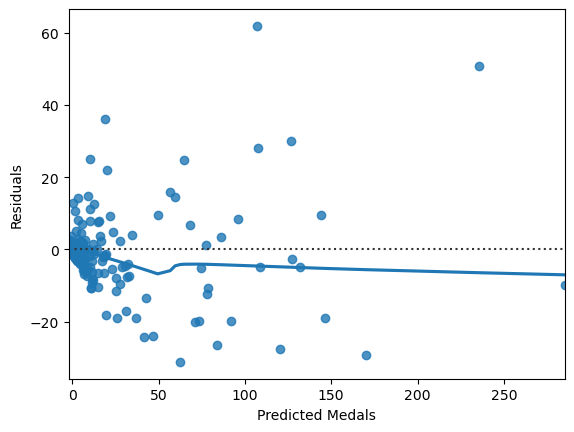

In [130]:
sns.residplot(x=predictions, y=test["medals"], lowess=True)
plt.xlabel('Predicted Medals')
plt.ylabel('Residuals')


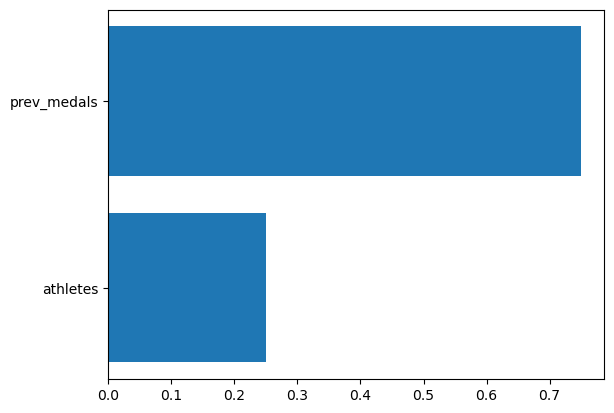

In [132]:
importances = rf.feature_importances_
plt.barh(predictors, importances)
plt.show()
